# Shipwreck Survival Prediction Project

## Problem Statement



The sinking of the Titanic is the most famous shipwrecks in history. Unfortunately, more than 1500 people didn’t survive. In this project we will work on a dataset that includes the passenger's information, and weather they survived or not. We will explore the data and train classifiers to predict the chance of survival for a passenger given her/his information.

## Setup and loading the data

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [467]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [468]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train2 = pd.read_csv('train.csv')

## Data Exploring 

In [469]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [470]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [471]:
train.shape

(891, 12)

In [472]:
test.shape

(418, 11)

In [473]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [474]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing Values

In [475]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [476]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Cleaning 

In [477]:
# Embarked 
train['Embarked'] = train['Embarked'].fillna('S')

In [478]:
# Age
# train
age_avg  = train['Age'].mean()
age_std  = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)
# test
age_avg  = test['Age'].mean()
age_std  = test['Age'].std()
age_null_count = test['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test['Age'][np.isnan(test['Age'])] = age_null_random_list
test['Age'] = test['Age'].astype(int)

In [479]:
# Cabin
#train
train['Cabin'] = train['Cabin'].fillna(0)
train['Cabin'] = train['Cabin'].apply(lambda c : 1 if c != 0 else c)
# test
test['Cabin'] = test['Cabin'].fillna(0)
test['Cabin'] = test['Cabin'].apply(lambda c : 1 if c != 0 else c)

In [480]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,0,S


In [481]:
missing_mean = (train[train['Pclass'] == 3]['Fare']).mean()
test['Fare'] = test['Fare'].fillna(missing_mean)

In [482]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [483]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Visualization

### Visualizing the distribution of the target values

0    0.616162
1    0.383838
Name: Survived, dtype: float64


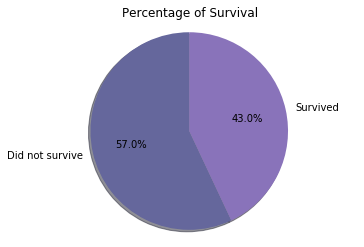

In [484]:
def percentage(part):
   whole= train['Survived'].value_counts().sum()
   percentage= (part/whole)
   return percentage
percentage= train['Survived'].value_counts().apply(lambda x : percentage(x))
print (percentage)
labels ='Did not survive','Survived'
sizes = [57, 43]
c=['#65679c','#8973ba']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=c,
       shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Percentage of Survival')
plt.show()

Text(0.5, 1.0, 'Age after filling null')

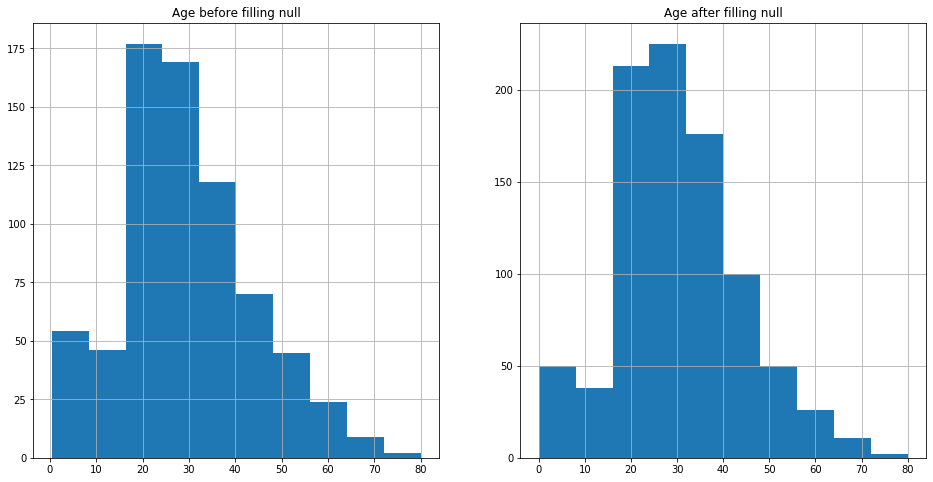

In [485]:
fig, axis = plt.subplots(1, 2,figsize=(16,8))
train2['Age'].hist(ax =axis[0] )
axis[0].set_title('Age before filling null')

train['Age'].hist(ax =axis[1] )
axis[1].set_title('Age after filling null')

Text(0.5, 1.0, 'Number of Survived people according to their sex')

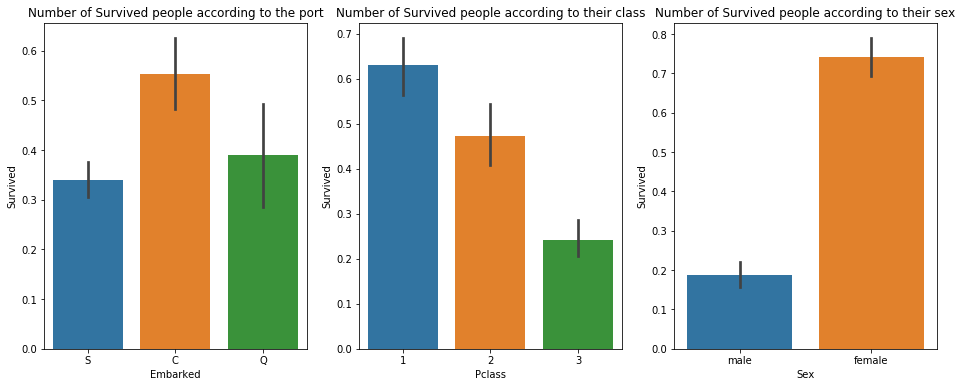

In [486]:
fig, axis = plt.subplots(1, 3,figsize=(16,6))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = axis[0])
axis[0].set_title('Number of Survived people according to the port')
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = axis[1])
axis[1].set_title('Number of Survived people according to their class')
sns.barplot(x = 'Sex', y = 'Survived', data=train, ax = axis[2])
axis[2].set_title('Number of Survived people according to their sex')

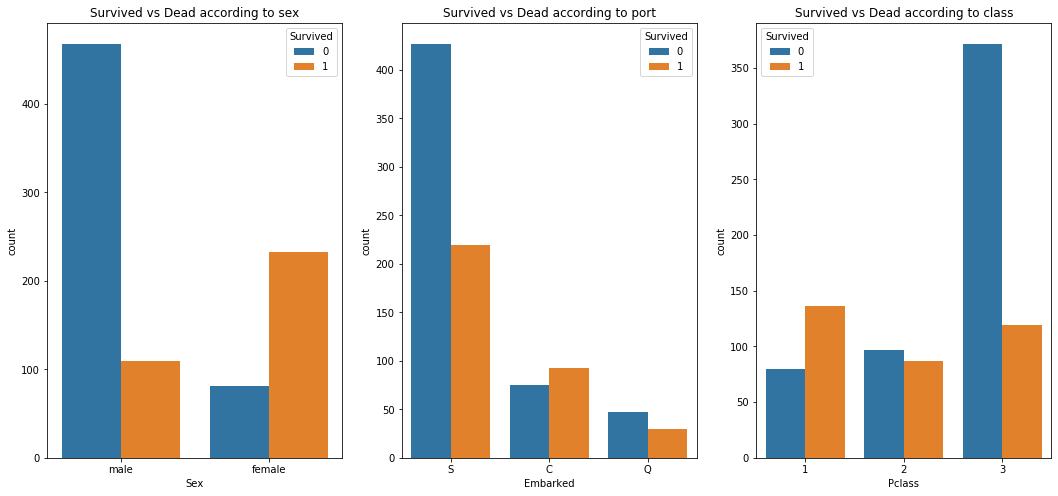

In [487]:
f,ax=plt.subplots(1,3,figsize=(18,8))

sns.countplot('Sex',hue='Survived',data=train,ax=ax[0])
ax[0].set_title('Survived vs Dead according to sex')

sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived vs Dead according to port')

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[2])
ax[2].set_title('Survived vs Dead according to class')

plt.show()

### Visualising the correlation between features

Text(0.5, 1, 'Correlation Between Features')

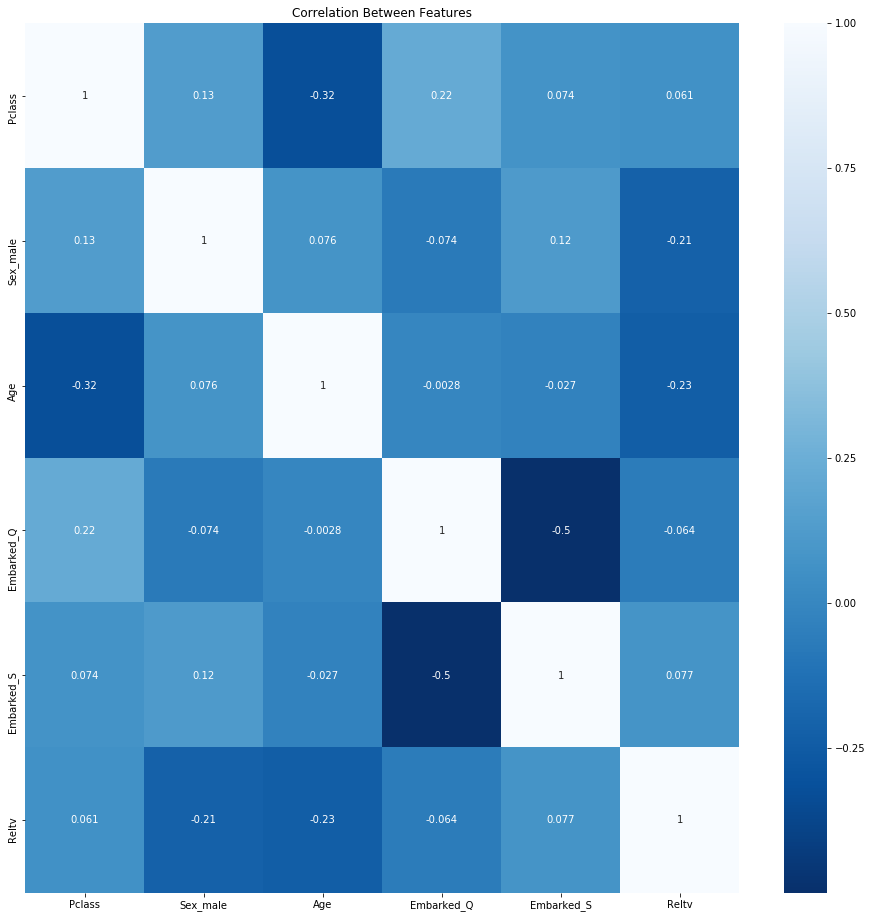

In [488]:
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(train.corr(),annot = True, cmap = 'Blues_r')
ax.set_title('Correlation Between Features')

## Feature Engineering
### Splitting the data and dropping features

In [489]:
y = train['Survived']
testID = test['PassengerId']
X_train= train.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Ticket'], axis=1)

### Getting dummies

In [490]:
X_train = pd.get_dummies(X_train,columns=['Embarked','Sex'],drop_first=True)
test = pd.get_dummies(test,columns=['Embarked','Sex'],drop_first=True)

### Scaling 

In [491]:
mms = MinMaxScaler()
X_train = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)
test = pd.DataFrame(mms.fit_transform(test), columns = test.columns)

# Train and test different models

## KNN

In [492]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y)
cross_val_score(knn, X_train, y, cv=5).mean()

0.786847268960386

In [493]:
y_predicted = knn.predict(test)

In [494]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('KNN.csv', index = False)

## SVM

### Linear

In [495]:
svm_l = svm.SVC(kernel='linear').fit(X_train, y)
svm_l.fit(X_train, y)
cross_val_score(svm_l, X_train, y, cv=5).mean()

0.7867150249291879

In [496]:
y_predicted = svm_l.predict(test)

In [498]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('SVMLinear.csv', index = False)

### Guassian

In [436]:
svm_rbf = svm.SVC(kernel='rbf').fit(X_train, y)
cross_val_score(svm_rbf, X_train, y, cv=5).mean()

0.7867150249291879

#### Grid search to find the best parameters (gamma,C)

In [437]:
np.logspace(-5, 2, 20)
parm_grid = {'gamma': np.logspace(-5, 2, 20),
            'C':[0.1,0.5, 0.7, 1, 10]}
svm_rbf = svm.SVC(kernel='rbf')
grid = GridSearchCV(svm_rbf, parm_grid, cv=5, verbose = 1)
grid.fit(X_train, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 1, 10],
                         'gamma': array([...9478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [438]:
grid.best_params_

{'C': 10, 'gamma': 0.6158482110660255}

In [439]:
grid.best_score_

0.8215488215488216

In [440]:
y_predicted = grid.predict(test)

In [441]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('SVMGuassian.csv', index = False)

## Decision Tree

In [442]:
dtree = DecisionTreeClassifier(max_depth=5).fit(X_train, y)
cross_val_score(dtree, X_train, y, cv=10).mean()

0.7936411871524232

In [443]:
preds = dtree.predict(test)

In [444]:
y_predicted = dtree.predict(test)

In [445]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('DecisionTree.csv', index = False)

#### Grid search to find the best parameters (max depth)

In [446]:
parm_grid2 = {'max_depth':[3,4,5,6,7]}
grid2 = GridSearchCV(DecisionTreeClassifier(), parm_grid2, cv=10, verbose = 1)
grid2.fit(X_train, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [3, 4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [447]:
grid2.best_params_

{'max_depth': 3}

In [448]:
grid.best_score_

0.8215488215488216

In [449]:
y_predicted = grid.predict(test)

In [450]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('DTGS.csv', index = False)

## AdaBoost

In [451]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=200)
classifier.fit(X_train, y)
cross_val_score(classifier, X_train, y, cv=5).mean()

0.7677143344515029

In [452]:
y_predicted = svm_l.predict(test)

In [453]:
pd.DataFrame({'PassengerId': testID,'Survived': y_predicted}).to_csv('AdaBoost.csv', index = False)

## Logistic Regression

In [454]:
# new feature that takes the number of the relativs 
X_train['Reltv'] = X_train['SibSp'] + X_train['Parch']
X_train = X_train[['Pclass','Sex_male','Age','Embarked_Q','Embarked_S','Reltv']]
test['Reltv'] = test['SibSp'] + test['Parch']
test = test[['Pclass','Sex_male','Age','Embarked_Q','Embarked_S','Reltv']]

In [455]:
log_modal = LogisticRegression().fit(X_train,y)
cross_val_score(log_modal,X_train,y,cv= 10).mean()

0.7957379979570991

In [456]:
y_predicted = log_modal.predict(test)

In [457]:
pd.DataFrame({'PassengerId': testID, 'Survived': y_predicted}).to_csv('LogisticRegression.csv', index = False)

#### Grid search to find the best parameters (C, Penalty, Solver)

In [458]:
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
clf.fit(X_train, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [459]:
clf.best_params_

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}

In [460]:
clf.best_score_

0.7957351290684624

In [461]:
y_predicted = clf.predict(test)

In [462]:
pd.DataFrame({'PassengerId': testID, 'Survived': y_predicted}).to_csv('LRGS.csv', index = False)

## Conclusion

In this experiment we predicted the chance of survival for a passenger using number of models. Then, we compared the scores of different models. We can see that the Decision Tree Classifier has the best prediction score.